# Week 4
## SIR with vaccination

Consider two different groups of people, those who have received a vaccine (denoted subscript $V$) and those who haven't (denoted subscript $N$). The total population size is $N$ and and number of vaccinated is $N_v$. The vaccine prevents infection with a rate of $\alpha$.

Hence we have
$$
\begin{align*}
S &\xrightarrow{\beta(I+I_V)S} I \xrightarrow{\mu I} R,\\
S_V &\xrightarrow{\beta(1-\alpha)(I+I_V)S_V} I_V \xrightarrow{\mu I_V} R_V.
\end{align*}
$$

Assuming $S\approx N$ and $S_V\approx N_V$ gives

$$
\begin{align*}
q_{1,0} = \frac{\beta N}{\beta N + \mu + \beta(1-\alpha)N_V}q_{2,0} + \frac{\mu}{\beta N + \mu + \beta(1-\alpha)N_V}q_{0,0} + \frac{\beta(1-\alpha)N_V}{\beta N + \mu + \beta(1-\alpha)N_V}q_{1,1} \\

q_{0,1} = \frac{\beta(1-\alpha)N_V}{\beta(1-\alpha)N_V + \mu + \beta N}q_{0,2} + \frac{\mu}{\beta(1-\alpha)N_V + \mu + \beta N}q_{0,0} + \frac{\beta N}{\beta (1-\alpha)N_V + \mu + \beta N}q_{1,1} \\
\end{align*}
$$

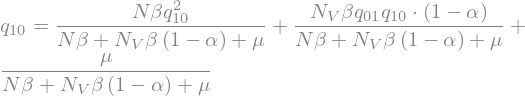

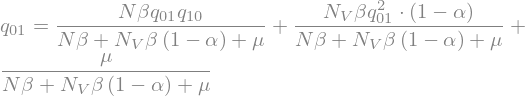

In [4]:
from sympy import *
init_printing()

mu, beta, alpha = symbols("mu beta alpha")
N, N_V = symbols("N N_V")

q, q_v = symbols("q_10 q_01")

sum1=beta*N + mu + beta*(1-alpha)*N_V
sum2=beta*(1-alpha)*N_V + mu + beta*N

eq1 = Eq(q, q**2*beta*N/sum1 + mu/sum1 + q*q_v*beta*N_V*(1-alpha)/sum1)
display(eq1)
eq2 = Eq(q_v, q_v**2*beta*(1-alpha)*N_V/(sum2) + mu/(sum2) + q*q_v*beta*N/(sum2))
display(eq2)

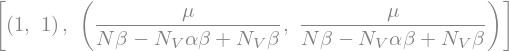

In [5]:
sol = solve([eq1, eq2], [q, q_v])
display(sol)

In [15]:
_N_V = 58281
_N = 100_000 - _N_V
_R_0 = 1.5
_mu = 1/8
_beta = _R_0*_mu/(_N+_N_V)
_alpha = 0.2

for s in sol[1]:
    tmp = s.subs(N_V, _N_V).subs(N,_N).subs(mu,_mu).subs(beta, _beta).subs(alpha, _alpha)
    print(1 - float(tmp))

0.24537243511523532
0.24537243511523532


## Gillespie